**CSE 512 Spring 2021 - Machine Learning - Homework 3**


---


Your Name: Irfan Ahmed \\
Solar ID : 113166464 \\
NetID Email: irfan.ahmed@stonybrook.edu

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/CSE512_ML/HW3/

/content/gdrive/MyDrive/Colab Notebooks/CSE512_ML/HW3


n: no of input rows
d: no of feature of each input

Inputs : 
* X_train ( n x d) \\
* y_train ( 1 x n) - label for each row
* X_test ( m x d) 
* k : no. of nearest neighbours

Outputs: 
* y_hat ( 1 x m) 
* Idxs ( m x k) - k nearest labels for m rows




In [ ]:
def KNNClassifier(X_train, y_train, X_test, k):
    distance_matrix = cdist(X_test,X_train, 'euclidean')
    Idxs = y_train[np.argsort(distance_matrix,axis = 1).ravel()].reshape(distance_matrix.shape)[:,:k]
    y_hat = mode(Idxs, axis = 1)[0].ravel()
    return y_hat, Idxs

In [ ]:
train_data = pd.read_csv('mnist_train.csv').to_numpy()
y_train = train_data[:,0]
X_train = train_data[:,1:]

test_data = pd.read_csv('mnist_test.csv').to_numpy()
y_test = test_data[:,0]
X_test = test_data[:,1:]

X_train,X_test = X_train/255, X_test/255
X_train = np.asarray(X_train, dtype = np.float32)
X_test = np.asarray(X_test, dtype = np.float32)


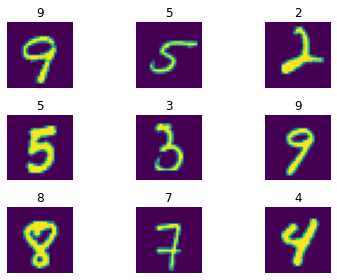

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(np.reshape(X_train[i], (28,28)))
  plt.title(y_train[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
k = np.max(y_train) + 1
m = [0, 1, 2, 4, 8, 16, 32]
acc = []
for i in range(len(m)):
  k = 2*m[i] + 1
  y_pred , Idxs_pred = KNNClassifier(X_train, y_train, X_test,k)
  acc.append(accuracy_score(y_pred,y_test))
  
acc = np.array(acc)

[0, 1, 2, 4, 8, 16, 32] [0.85 0.87 0.86 0.87 0.84 0.8  0.71]


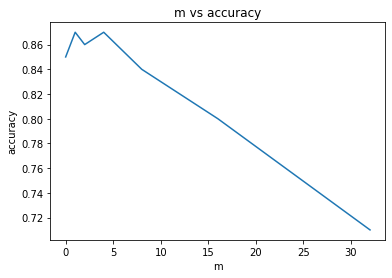

In [ ]:
plt.plot(m,acc)
plt.xlabel('m')
plt.ylabel('accuracy')
plt.title('m vs accuracy')

print(m,acc)

2.2.1) With increasing k value, the accuracy is getting lowered. In the beginning with increasing k value, accuracy was around 0.85 and then instantaneously decreased for m = 16 and kept decreasing for greater values of m. 

In [ ]:
k = 3
acc = []
n = [100, 200, 400, 600, 800, 1000]
for i in range(len(n)):
  y_pred , Idxs_pred = KNNClassifier(X_train[:n[i],:], y_train[:n[i]], X_test,k)
  acc.append(accuracy_score(y_pred,y_test))
  
acc = np.array(acc)

[100, 200, 400, 600, 800, 1000] [0.62 0.79 0.8  0.83 0.85 0.87]


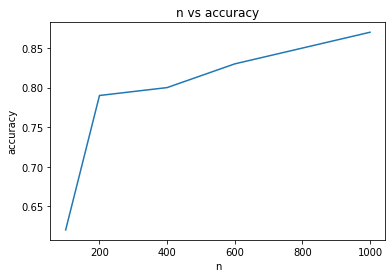

In [ ]:
plt.plot(n,acc)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.title('n vs accuracy')

print(n,acc)

2.2.2) With increasing training data, the accuracy is increasing and settles at 0.87. 

In [ ]:
y_pred , Idxs_pred = KNNClassifier(X_train, y_train, X_test,3)
print(accuracy_score(y_pred,y_test))

0.83


2.2.3) The accuracy is lower than accuracy using euclidean distance. The accuracy obtained is 0.83 whereas using euclidean we get 0.87 for k=3. 

In [ ]:
def plots(orig,orig_label, X,y):
  fig = plt.figure()
  plt.subplot(5,5,1)
  plt.imshow(np.reshape(orig, (28,28)))
  plt.title('Original : '+ str(orig_label))
  plt.axis('off')
  for i in range(1,5):
    plt.subplot(5,5, i+1)
    plt.imshow(np.reshape(X[i], (28,28)))
    plt.title(y[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
y_pred , Idxs_pred = KNNClassifier(X_train, y_train, X_test,5)

In [ ]:
wrongly_classified = np.where(y_pred!=y_test)[0]

2.2.4)


------------




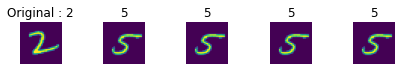



------------




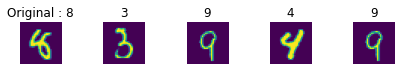



------------




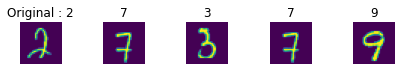

In [ ]:
print('2.2.4)')
for i in range(3):
  print("\n\n------------\n\n")

  neighbours = Idxs_pred[wrongly_classified[i]]
  X = X_train[neighbours]
  y = y_train[neighbours]
  original = X_test[wrongly_classified[i]]
  original_label = y_test[wrongly_classified[i]]
  plots(original,original_label,X,y)


